<a href="https://colab.research.google.com/github/JMindpalace/Machine_Learning/blob/main/5.1%20%EA%B3%BC%EC%A0%81%ED%95%A9%20%ED%95%B4%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

< 해당 페이지는 **과적합 해소**를 목표로 하는 페이지입니다. >

> 모델링의 결과인 훈련과 테스트 결과값이 치우쳐졌거나 낮을 경우를 조정하는 것이 목표입니다.

> 기대 결과 값: 일반화(테스트 데이터에서의)오차 최소화<br>
> 기대 모델: 일반화된 모델(새로운 데이터 예측이 정확한 모델)

# 과적합 해소

## 분산과 편향의 Trade-off(반비례관계)
> 모델 복잡도를 변경하여 좋은 일반화 지점 찾기<br>

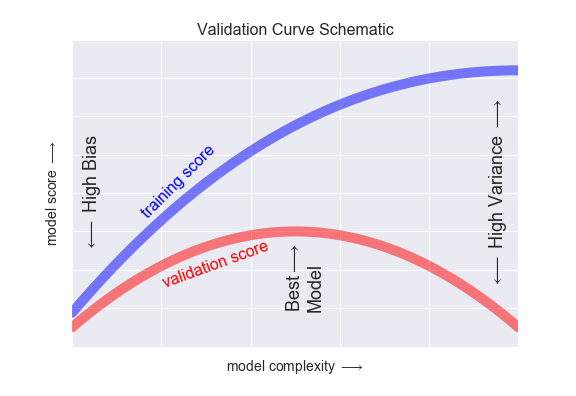

## 과**대**적합(Over-fitting) - 복잡도가 복잡한 모델
> 학습을 너무 많이해서 예측이 힘든 상황(훈련셋 성능 높음, 테스트셋 성능 낮음)<br>
> High Var(분산)형: 훈련 변동에 따른 테스트셋의 민감도, 비선형 모델 가능성 높음

### 0. 더 많은 데이터 학습
이 경우 Cross-Validation를 사용하여 과적합 해소 가능

### 1. 정규화(Regularized) 회귀모델 - 상관계수 (통제)규제
> 규제항으로 선형모델의 회귀계수를 감소시켜 단순한 모델 만들기<br>
> 편향을 더하고 분산을 줄여 모델 만듬

> 입력 특성의 스케일에 민감하기에 표준화 작업이 필수적

> λ(Lambda=alpht): 패널티의 강도를 조절하는 하이퍼-파라미터<BR>
> λ가 클수록 회귀계수 감소(수평적이됨), 0이면 기존과 같고 ∞면 β=0

In [ ]:
?? ridge의 bias를 높이면 얻는 효과

In [ ]:
# Ridge & Lasso def
def model_predict(i, model) :
  ml = model(alpha=i, normalize=True)
  ml.fit( [[x]] , [y] )

  m = ml.coef_
  b = ml.intercept_
  folmula = f'y = {m}x + {b}'

  model_pred = ml.predict( [[x]] )

  return model_pred , folmula

# Ridge & Lasso graphe
def plotting(model, i):
  for i in i:
    predic , formula = model_predict(i, model)
    df.plot('x', 'y_pred')
    df.text(size_n, df.loc[27, 'y_pred'], formula)

# Ridge & Lasso call
alphas = np.arange(0, 2, 0.5)
plotting( Ridge|Lasso , alphas )

In [ ]:
# Ridge - L2 패널티(가중치들의 제곱합), 영향력 낮은 회귀계수는 0으로 축소
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
from sklearn.linear_model import Ridge, RidgeCV
ridge = Ridge(alpha=n, normalize=True) # 파라미터는 패널티와 표준화작업
ridge = RidgeCV(alpha=ns, cv=5) # alpha는 교차검증할 패널티들(np.arange), cv는 검증 횟수

ridge.fit( [[x]] , [y] )

ridge_pred = ridge.predict( [[x]] )
ridge.coef_ # ridge 기울기
ridge.intercept_ # ridge y절편
ridge.alpha_ # RidgeCV를 했을 경우 최적의 패널티

In [ ]:
# Lasso - L1 패널티(가중치들의 절댓값합), 영향력 낮은 회귀계수는 0으로 치환 > 특성 선택 효과
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso
from sklearn.linear_model import Lasso, LassoCV
lasso = Lasso(alpha=n, normalize=True) # 파라미터는 패널티와 표준화작업
lasso = LassoCV(alpha=ns, cv=5) # RidgeCV, LassoCV는 데이터분리 필요없음, 훈련데이터를 훈련/검증으로 분리

lasso.fit( [[x]] , [y] )

lasso_pred = lasso.predict( [[x]] )
lasso.coef_ # (lasso.coef_ != 0).sum() - 회귀계수를 0으로 치환하기에 0이 아닌 특성 수 확인
lasso.intercept_
lasso.alpha_ # LassoCV를 했을 경우 최적의 패널티

In [ ]:
# ElasticNet: L1 + L2 패널티
# https://en.wikipedia.org/wiki/Elastic_net_regularization
# https://scikit-learn.org/stable/modules/linear_model.html#elastic-net



---



---



### 2. 하이퍼-파라미터 조정: 모델구조 혹은 학습 옵션 조정
> 모델 복잡성과 하이퍼-파라미터 관계 숙지<br>

> max_depth의 증가는 복잡도 증가<br>
> min_samples_leaf의 증가는 복잡도 감소

In [ ]:
# 조정 기본 요소
# 1. 조정 대상 모델
# 2. 하이퍼-파라미터 탐색 범위
# 3. 하이퍼-파라미터 조합
# 4. 검증 방법
# 5. Scoring Metric(우수 조합 선택)

In [ ]:
# 중요 하이퍼-파라미터부터 조정

In [ ]:
# 자동 하이퍼-파라미터 찾기
# 1. Exhaustive Grid Search: 모든 조합을 검증

# 2. Randommized Search: 랜덤 조합을 검증(단, 이상적 조합 발견이 어려울 수 있음)

# 3. Bayesian Search: 좋은 조합을 확률적 탐색



---



---



### 3-1. 특성 조정(Feature Importance) - 어떤 특성이 중요한가
> 모델의 예측값(성능)에 대한 특성들의 중요도 확인<br>
> 낮은 중요도는 Drop

In [ ]:
# 특성 중요도(회귀 coef_ , 트리기반 feature_importance_) 기반 특성 선택
df.nunique() # 특성 확인

#### 특성 선택

In [ ]:
from sklearn.feature_selection import f_regression, SelectKBest

select_feature = SelectKBest(score_func = f_regression, k=50)
select_feature.fit_transform(X_train, y_train)

select_feature.get_feature_names_out() # 선택된 특성 출력

#### MDI(Mean Decrease impurity)
> 트리 기반 모델에서 사용, Specific Model

In [ ]:
pipe = make_pipeline( OrdinalEncoder(),RandomForestClassifier() )
rf = pipe.named_steps['randomforestclassifier'] # rf로 파이프라인 속성에 접근
importances = pd.Series(rf.feature_importances_, X_train.columns) # 특성 이름 , 특성 중요도
importances.sort_values().plot.barh() # MDI 시각화

In [ ]:
# 단, MDI의 추가적인 단점은 트리기반이기에 Cardinality의 의존도가 높다는 점이다
X_train.nunique().sort_values().plot.barh() # Cardinality 그래프화

#### Drop-Column Importance
> 모든 특성을 가진 모델(기준) - 특정 특성을 제거하고 재학습한 모델<br>
> 평가 하락시 중요 특성으로 파악함, Agnostic Model

In [ ]:
base_score = pipe.score(X_test, y_test)

dci = pd.Series(dtype=float)
for i in features: # features는 target과 분리 시 사용
  p = pipe()

  p.fit(X_train.drop(columns=[i], axis=1), y_train) # 특성 1개 drop 후 모델 재학습 - 큰 단점
  score_dropped = p.score(X_test.drop(columns=[i], axis=1), y_test) # 특성 1개 drop한 모델의 점수
  dci[feature] = score - score_dropped

dci.sort_values().plot.barh()

#### Permutation Importance(순열 중요도)
> 기준모델에서 특성마다 노이즈를 주어 성능 감소폭 확인<br>
> 모든 모델에서 적용이 가능함, Agnostic&Global Model

In [ ]:
pi, n_iter = pd.Series((dtype=float), 10 # 성능 확인 과정 반복 횟수

for i in features:  # 노이즈를 줄 feature 선택
  X_test_permed = X_test_copy() # 중첩에서 변수값 변경
  scores_permutated = []

  for _ in range(n_iter):
    X_test_permed[i] = np.random.permutation(X_test_permed[i])
    scores_permutated.append( pipe.score(X_test_permed, y_test) )
  avg_score = np.mean(scores_permutated) # 성능들의 평균 점수
  pi[features] = score - avg_score       # 성능 하락폭
pi.sort_values().plot.barh()

# eli5 라이브러리 사용
permuter = PermutationImportance(
    pipe.named_steps["randomforestclassifier"],  # model
    scoring="accuracy", n_iter=10, random_state=2
)
X_test_eli5 = pipe[0].transform(X_test) # OrdinalEncoder 사용
permuter.fit(X_test_eli5, y_test)

feature_names = X_test.columns.tolist()
pd.Series( permuter.feature_importances_, feature_names ).sort_values().plot.barh()

eli5.show_weights( # 특성별 score
    permuter,
    top=None,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=feature_names,  # list 형식
)



---



---



### 3-2. 특성 영향 - 특성이 관계에 어떻게 영향을 줬는가
> 특성 변화에 따른 모델 예측의 변화

> 부분 의존도?

#### ICE(Individual Conditional Expectation) Plot
> 개별 특성 값의 변화에 따른 모델 예측 변화, Agnostic&Local Model

In [ ]:
def get_iceplot_data(data, data_index, target_feature, target_feature_range):
  change_data, results = data.iloc[[data_index]].copy(), []

  for i in target_feature_range: # 타겟범위(range로 최소~최대 등)
    change_data[target_feature] = i # 타겟 데이터 변경
    pred_proba = model_name.predict_proba(change_data)[:,1] # 바뀐 데이터로부터 확률 예측
    results.append(pred_proba.item())
  results = np.array(results)
  return target_feature_range, results-results[0] # 최소(0)를 기준으로 예측의 상대값(변화량을 보기 위함)

for i in [0, 10, 100, 1000]: # 변화를 확인할 특성 데이터 행
  plt.plot(*get_iceplot_data( # *표시를 붙여 인자로서 함수에 입력하면 함수의 정의된 위치에 맡게 입력
      X_test_encoded, data_index, target_feature, target_feature_range
  )) # 결과값은 모델의 예측값이고, 파란 범위는 신뢰구간

#### PDP(Partial Dependence Plots) - ICE의 평균
> 특성 전체가 모델의 반응양상(어떻게 분석하고 이해하는지) 시각화<BR>

< 해석 주의 - Agnostic&Global Model >
> 특성간 독립성이 전제됨 - 강한 상관관계의 경우 비현실적인 예측을 함<br>(서로 다른 특성 샘플에 변화 타겟 값이 동일 분포로 가정함, 특성 값이 없다면 만들어서 예측)<br>
> 특성 값의 분포 주의(특성 관계가 강하면 구분 불가능)

In [ ]:
# PDP 라이브러리 사용
isolated = pdp_isolate(
    model = model_naem,
    dataset = X_encoded,
    model_features = X_.columns,
    feature = target_feature,
    grid_type = 'percentile' # or equal
    num_grid_poins = n # default = 10, x축 범주
    # cust_grid_points = [-100, 0 , 100, 1000] # 특성값을 볼 지점 지정가능
)
pdp_plot(isolated,
         feature_name = target_feature, # 타겟은 1개로 설정!
         plot_line = True, # ICE Plot
         frac_to_plot = 50, # int면 plot할 데이터 수 , float이면 전체 데이터 갯수 중 plotting할 데이터 수의 비율
         # 선택 기준은 np.sample로 선택
         plot_pts_dist = True
)

In [ ]:
# PDP Heat-map > 예측값 자체를 반환
interaction = pdp_interact(
    model = model_naem,
    dataset = X_encoded,
    model_features = X_.columns,
    feature = target_feature # 타겟이 2개로 설정!
    # cust_grid_points = [ [], None ] # 첫번째 특성은 지정, 두번째 특성은 자동 grid
)
pdp_interact_plot(interaction, plot_type='grid', feature_name = target_feature)

In [ ]:
# PDP 범주형 타겟 - 학습 때 자동 수치형으로 인코딩 변환됨
mappings = encoder.mapping # mappings시 학습 encoder로부터 특성들이 각 값이 어떤 수치로 매핑된지 확인 가능
mapping_data = list(filter(lambda x: x['col'] == target_feature, mappings)) # 매핑에서 타겟 특성 1개 추출
maps = mapping_data[0]['mapping']

encoded_features = maps.values.tolist() # 인코딩된 수치형 값
original_features = maps.index.tolist() # 원래 특성값

pdp_plot(isolated, target_feature)
plt.xticks(encoded_features, original_features, rotation=90)



---



---



## 과**소**적합(Under-fitting) - 복잡도가 단순한 모델
> 훈련 데이터조차 학습에 실패함(훈련, 테스트셋 모두 낮은 성능)<br>
> High bias(편향)형: 잘못된 학습(알고리즘-모델)으로 특성&타겟 관계 파악 못함